Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [23]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [24]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [25]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_Folder/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_Folder/Test')

In [26]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2246
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [27]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [28]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)##todo

Found 2246 files belonging to 9 classes.
Using 1797 files for training.


In [29]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)##todo

Found 2246 files belonging to 9 classes.
Using 449 files for validation.


In [30]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
classNames = train_ds.class_names
print(classNames)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

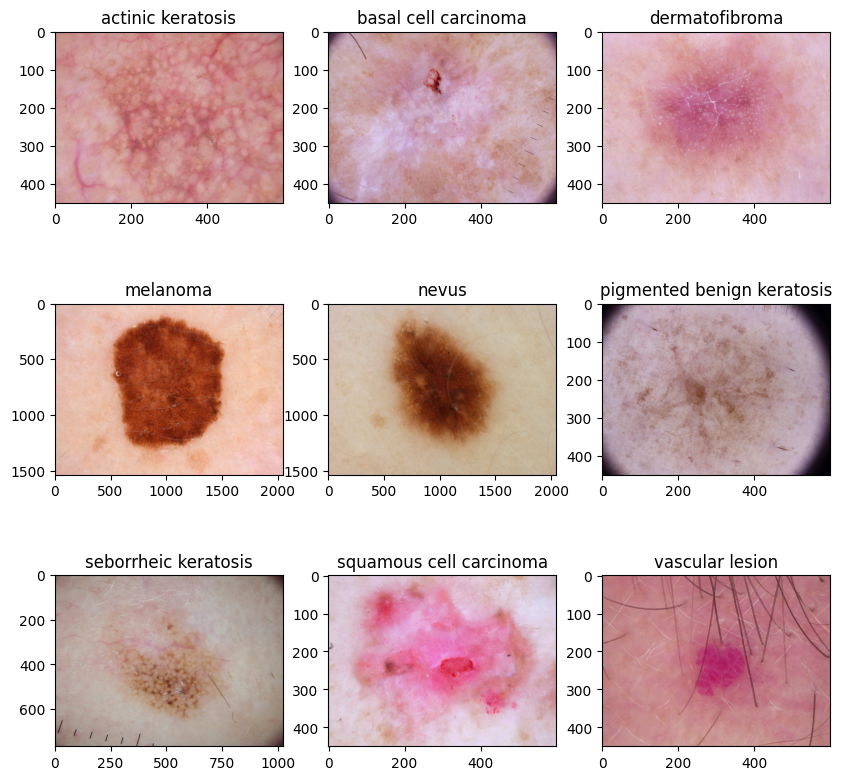

In [31]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(classNames[i]+'/*.jpg'))[1]))
  plt.title(classNames[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [32]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [33]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(classes, activation = "softmax"))

In [34]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [35]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [36]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 26s 178ms/step - loss: 2.0773 - accuracy: 0.1937 - val_loss: 1.9928 - val_accuracy: 0.2806
Epoch 2/20
57/57 [==============================] - 5s 91ms/step - loss: 1.9236 - accuracy: 0.2716 - val_loss: 1.8746 - val_accuracy: 0.2918
Epoch 3/20
57/57 [==============================] - 5s 91ms/step - loss: 1.8428 - accuracy: 0.3127 - val_loss: 1.7213 - val_accuracy: 0.4076
Epoch 4/20
57/57 [==============================] - 5s 91ms/step - loss: 1.7371 - accuracy: 0.3645 - val_loss: 1.8899 - val_accuracy: 0.2895
Epoch 5/20
57/57 [==============================] - 5s 90ms/step - loss: 1.7092 - accuracy: 0.3701 - val_loss: 1.7617 - val_accuracy: 0.3541
Epoch 6/20
57/57 [==============================] - 5s 88ms/step - loss: 1.6320 - accuracy: 0.4112 - val_loss: 1.6024 - val_accuracy: 0.4321
Epoch 7/20
57/57 [==============================] - 5s 90ms/step - loss: 1.5593 - accuracy: 0.4430 - val_loss: 1.6506 - val_accuracy: 0.4343
Epoch 8/20


### Visualizing training results

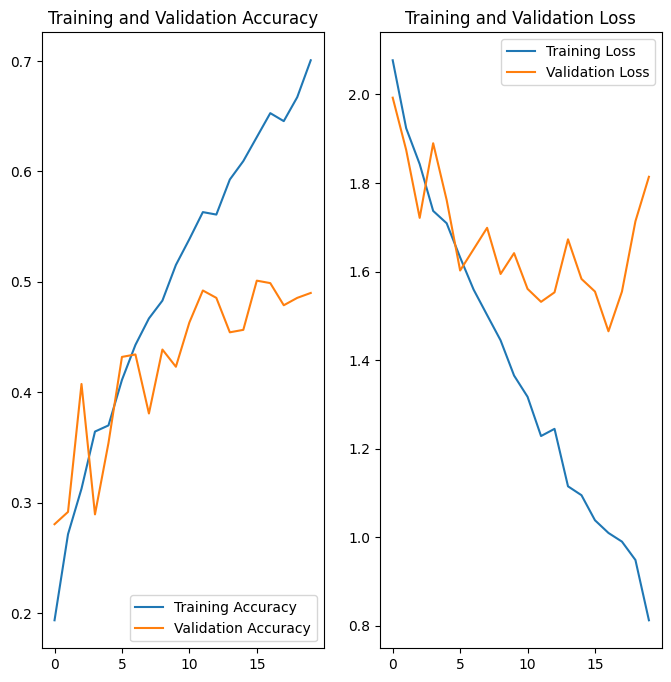

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

*   It looks like the model has overfitted. The loss in training and validation has a huge difference after around the 8th epoch
*   Accuracy achieved is about 70%.



In [38]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
augumented_data = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

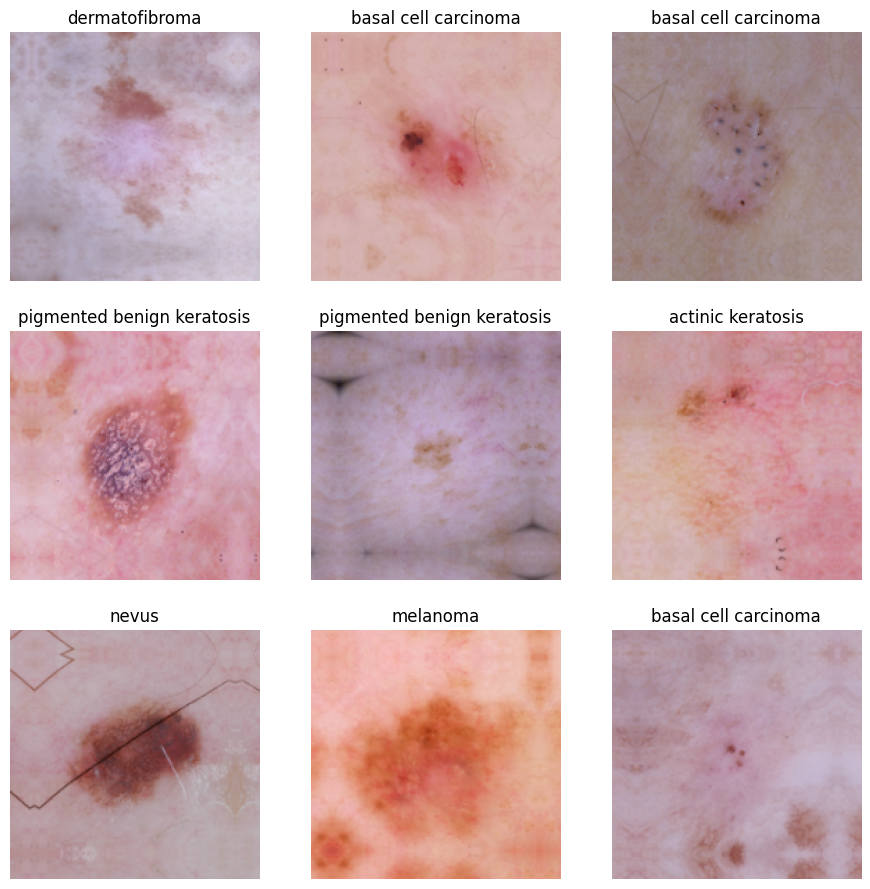

In [39]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(11, 11))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augumented_data(images)[i].numpy().astype("uint8"))
        plt.title(classNames[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [40]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([ augumented_data,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(classes, activation = "softmax"))

### Compiling the model

In [41]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [42]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
## your training code

Epoch 1/20
57/57 [==============================] - 10s 120ms/step - loss: 2.0256 - accuracy: 0.2198 - val_loss: 1.9460 - val_accuracy: 0.2650
Epoch 2/20
57/57 [==============================] - 6s 104ms/step - loss: 1.8762 - accuracy: 0.2766 - val_loss: 1.7936 - val_accuracy: 0.2940
Epoch 3/20
57/57 [==============================] - 6s 105ms/step - loss: 1.8992 - accuracy: 0.2960 - val_loss: 1.8512 - val_accuracy: 0.3163
Epoch 4/20
57/57 [==============================] - 6s 103ms/step - loss: 1.7728 - accuracy: 0.3450 - val_loss: 1.6380 - val_accuracy: 0.3942
Epoch 5/20
57/57 [==============================] - 6s 105ms/step - loss: 1.6618 - accuracy: 0.3957 - val_loss: 1.6133 - val_accuracy: 0.4499
Epoch 6/20
57/57 [==============================] - 6s 103ms/step - loss: 1.6801 - accuracy: 0.4023 - val_loss: 1.5610 - val_accuracy: 0.4254
Epoch 7/20
57/57 [==============================] - 6s 106ms/step - loss: 1.5946 - accuracy: 0.4207 - val_loss: 1.6252 - val_accuracy: 0.3920
Epoch

### Visualizing the results

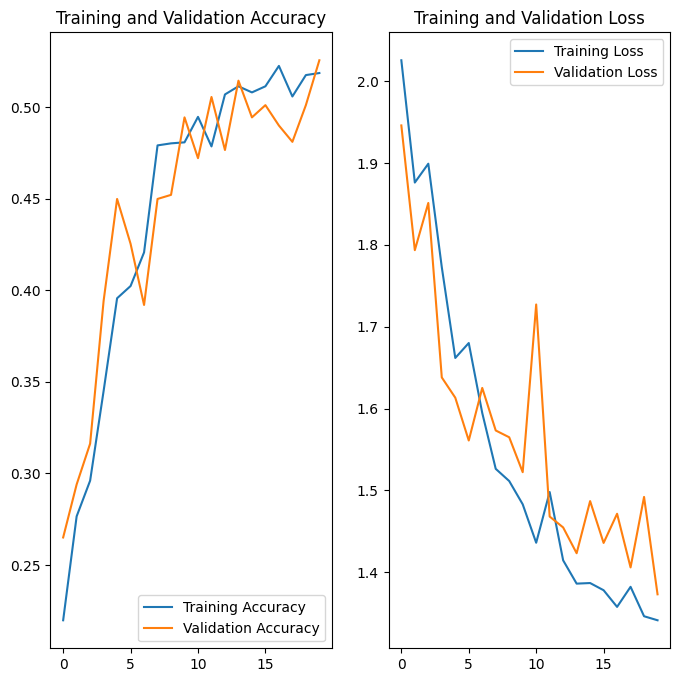

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?



*   We don't see any overfitting happening on the train data this time after doing the data augmentation and introducing dropouts
*   The accuracy has not improved much but increasing the number of epochs can be tired to get better accuracy.



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [44]:
path_list=[]
lesion_list=[]
for i in classNames:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])

<BarContainer object of 9 artists>

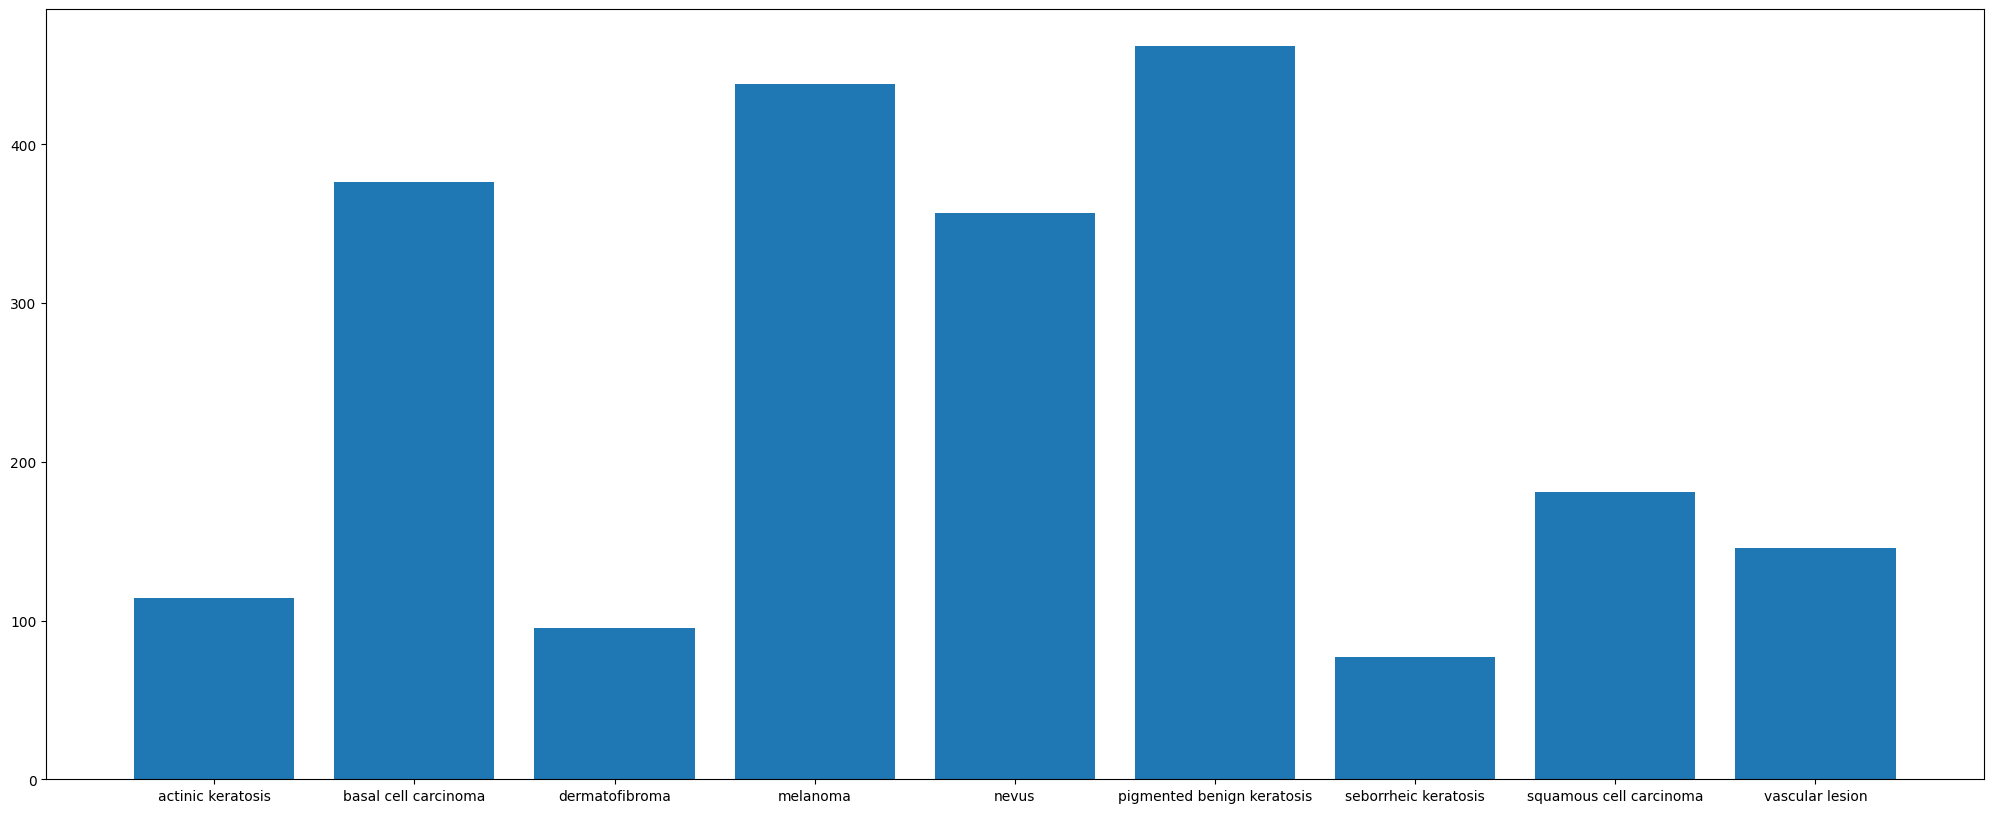

In [45]:
## Your code goes here.
elementcount=[]
for i in classNames:
    elementcount.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(classNames,elementcount)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
       Seborrheic Kreatosis has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
      Melanoma and Pigmented benign keratosis have proprtionate number of samples and are also the classes that dominate in terms of proportioante number of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [46]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [47]:
# path_to_training_dataset="To do"
import Augmentor
for i in classNames:
    p = Augmentor.Pipeline("/content/gdrive/MyDrive/CNN_Folder/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2246 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Folder/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78BFA036F310>: 100%|██████████| 500/500 [00:45<00:00, 10.88 Samples/s]


Initialised with 2246 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Folder/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78BF34449B10>: 100%|██████████| 500/500 [00:41<00:00, 11.91 Samples/s]


Initialised with 2246 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Folder/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78BFBC0E3A30>: 100%|██████████| 500/500 [00:50<00:00,  9.83 Samples/s]


Initialised with 2246 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Folder/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78BF3C39B3A0>: 100%|██████████| 500/500 [00:48<00:00, 10.34 Samples/s]


Initialised with 2246 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Folder/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78BF34348970>: 100%|██████████| 500/500 [00:48<00:00, 10.25 Samples/s]


Initialised with 2246 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Folder/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78BF343481F0>: 100%|██████████| 500/500 [00:40<00:00, 12.23 Samples/s]


Initialised with 2246 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Folder/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78BF3C27BD90>: 100%|██████████| 500/500 [00:49<00:00, 10.15 Samples/s]


Initialised with 2246 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Folder/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78BF4A109CF0>: 100%|██████████| 500/500 [00:42<00:00, 11.69 Samples/s]


Initialised with 2246 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Folder/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78BFBC0E0940>: 100%|██████████| 500/500 [00:48<00:00, 10.37 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [49]:
augdata_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_Folder/Train/output")
image_count_train = len(list(augdata_dir_train.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [50]:
path_list_new=[]
lesion_list_new=[]
for i in classNames:
    for j in augdata_dir_train.glob(i+'/*.jpg'):
        path_list_new.append(str(j))
        lesion_list_new.append(i)

In [51]:
# path_list = [x for x in glob(os.path.join(augdata_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/CNN_Folder/Train/output/actinic keratosis/actinic keratosis_original_ISIC_0026194.jpg_3a8a7e62-7767-4989-86db-09b3e458e232.jpg',
 '/content/gdrive/MyDrive/CNN_Folder/Train/output/actinic keratosis/actinic keratosis_original_ISIC_0032422.jpg_c9453a6b-d13b-47a5-a753-0a922c693b7f.jpg',
 '/content/gdrive/MyDrive/CNN_Folder/Train/output/actinic keratosis/actinic keratosis_original_ISIC_0029210.jpg_93dbef13-bc15-4caa-9495-bc907f6682e8.jpg',
 '/content/gdrive/MyDrive/CNN_Folder/Train/output/actinic keratosis/actinic keratosis_original_ISIC_0029830.jpg_9f5cb090-0611-49e2-b6d5-4162bab2967d.jpg',
 '/content/gdrive/MyDrive/CNN_Folder/Train/output/actinic keratosis/actinic keratosis_original_ISIC_0031108.jpg_33b8ec24-620a-44be-9f11-1bc07214f4b0.jpg',
 '/content/gdrive/MyDrive/CNN_Folder/Train/output/actinic keratosis/actinic keratosis_original_ISIC_0030655.jpg_23de6794-8693-4937-9744-b2c73d0708c9.jpg',
 '/content/gdrive/MyDrive/CNN_Folder/Train/output/actinic keratosis/ac

In [52]:
# lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [53]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [54]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-54-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [55]:
new_df['Label'].value_counts()

pigmented benign keratosis    1383
melanoma                      1334
basal cell carcinoma          1129
nevus                         1047
squamous cell carcinoma        554
vascular lesion                461
actinic keratosis              331
dermatofibroma                 285
seborrheic keratosis           222
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [56]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [57]:
data_dir_train_new = pathlib.Path("/content/gdrive/MyDrive/CNN_Folder/Train")

In [58]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_new,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6746 files belonging to 10 classes.
Using 5397 files for training.


#### **Todo:** Create a validation dataset

In [59]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_new,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6746 files belonging to 10 classes.
Using 1349 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [60]:
## your code goes here
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [61]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [62]:
## Your code goes here, use 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 55s 306ms/step - loss: nan - accuracy: 0.0189 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/50
169/169 [==============================] - 50s 289ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/50
169/169 [==============================] - 49s 283ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/50
169/169 [==============================] - 49s 280ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/50
169/169 [==============================] - 47s 269ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/50
169/169 [==============================] - 50s 291ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/50
 59/169 [=========>....................] - ETA: 25s - loss: nan - accuracy: 0.0159

KeyboardInterrupt: 

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

